<a href="https://colab.research.google.com/github/Pointdexter99/ML-models/blob/main/Complex_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

--2021-01-19 15:42:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   131MB/s    in 1.1s    

2021-01-19 15:42:21 (131 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile
 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [3]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse48-2.png', 'horse10-6.png', 'horse13-2.png', 'horse22-6.png', 'horse31-0.png', 'horse13-6.png', 'horse16-6.png', 'horse50-2.png', 'horse37-6.png', 'horse36-0.png']
['human01-02.png', 'human01-10.png', 'human05-05.png', 'human01-22.png', 'human04-22.png', 'human02-01.png', 'human17-16.png', 'human02-02.png', 'human13-08.png', 'human17-23.png']


In [4]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [5]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0

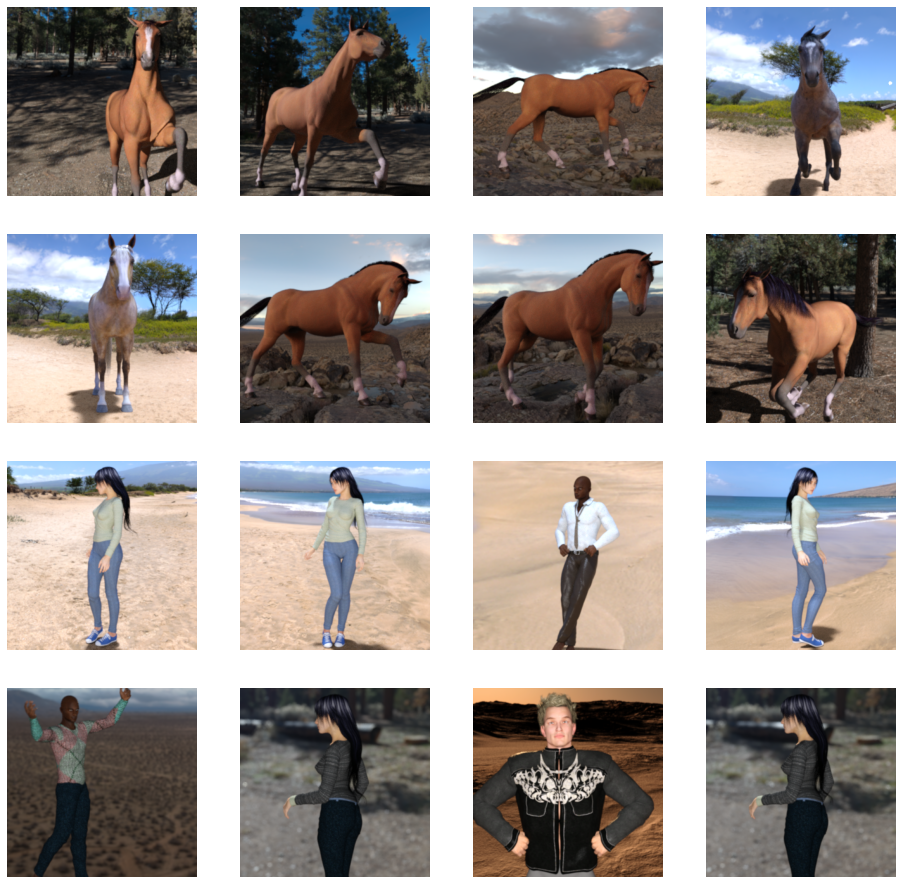

In [6]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300,300,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32,(3,3), activation='relu',),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3), activation='relu',),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                    
                                   tf.keras.layers.Conv2D(64,(3,3), activation='relu',),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3), activation='relu',),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   tf.keras.layers.Dense(1, activation='sigmoid')]
                                   )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [8]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics =['acc'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [10]:
history = model.fit(train_generator,
                    epochs=15,
                    steps_per_epoch=8,
                    verbose=1)

Epoch 1/15
8/8 [==============================] - 80s 10s/step - loss: 1.0036 - acc: 0.5121
Epoch 2/15
8/8 [==============================] - 74s 9s/step - loss: 0.6700 - acc: 0.6069
Epoch 3/15
8/8 [==============================] - 73s 10s/step - loss: 0.9236 - acc: 0.5544
Epoch 4/15
8/8 [==============================] - 74s 9s/step - loss: 0.6122 - acc: 0.7536
Epoch 5/15
8/8 [==============================] - 74s 9s/step - loss: 0.8353 - acc: 0.8435
Epoch 6/15
8/8 [==============================] - 83s 10s/step - loss: 0.4502 - acc: 0.8343
Epoch 7/15
8/8 [==============================] - 83s 10s/step - loss: 0.1978 - acc: 0.9322
Epoch 8/15
8/8 [==============================] - 74s 11s/step - loss: 0.1749 - acc: 0.9314
Epoch 9/15
8/8 [==============================] - 76s 9s/step - loss: 0.1667 - acc: 0.9416
Epoch 10/15
8/8 [==============================] - 74s 9s/step - loss: 0.0947 - acc: 0.9703
Epoch 11/15
8/8 [==============================] - 73s 9s/step - loss: 0.3675 - acc:

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving color-portrait-photo-hppy-smiling-260nw-61131520.webp to color-portrait-photo-hppy-smiling-260nw-61131520.webp
[1.]
color-portrait-photo-hppy-smiling-260nw-61131520.webp is a human
